In [3]:
# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

In [4]:
# Số câu hỏi và xác suất lựa chọn đáp án đúng ở một câu trả lời
n, p = 10, 0.25

In [3]:
# Phát sinh ngẫu nhiên số câu đúng
binom.rvs(n, p)

2

In [4]:
bi_sam_10 = binom.rvs(n, p, size=10)
bi_sam_10

array([0, 2, 2, 2, 3, 6, 4, 5, 1, 3], dtype=int64)

In [5]:
# Lập bảng phân phối tần số thống kê số lượng câu trả lời đúng.
# số câu đúng - số lượng bạn đúng số câu đúng
# ví dụ số câu đúng là 4 - có 4 bạn có 4 câu đúng
pd.Series(data=bi_sam_10, name='Số câu đúng').value_counts().sort_index()

Số câu đúng
0    1
1    1
2    3
3    2
4    1
5    1
6    1
Name: count, dtype: int64

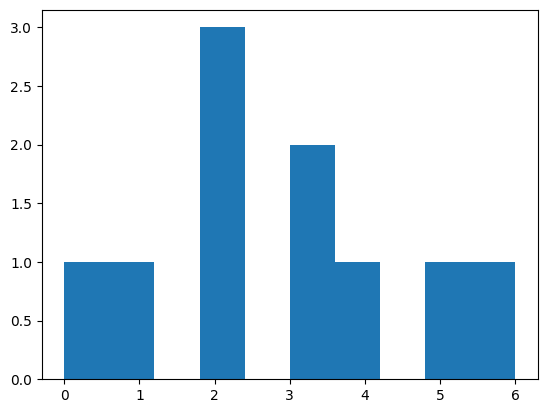

In [6]:
plt.hist(bi_sam_10)
plt.show()

In [7]:
# Phát sinh mẫu kích thước 1000 theo phân phối Nhị Thức
bi_sam_1000 = binom.rvs(n, p, size=1000)
freq_table = pd.Series(data=bi_sam_1000, name='Số câu đúng').value_counts().sort_index()
freq_table

Số câu đúng
0     54
1    205
2    288
3    238
4    137
5     57
6     15
7      6
Name: count, dtype: int64

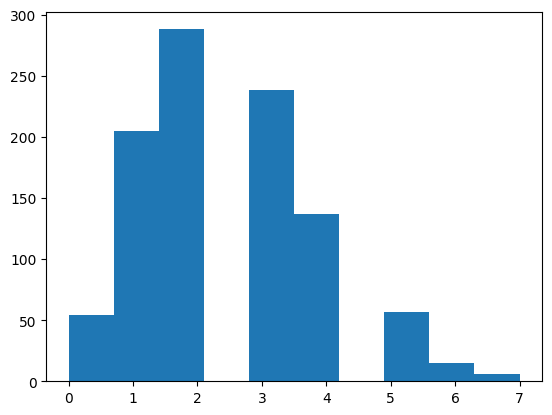

In [8]:
# Vẽ histogram
plt.hist(bi_sam_1000)
plt.show()

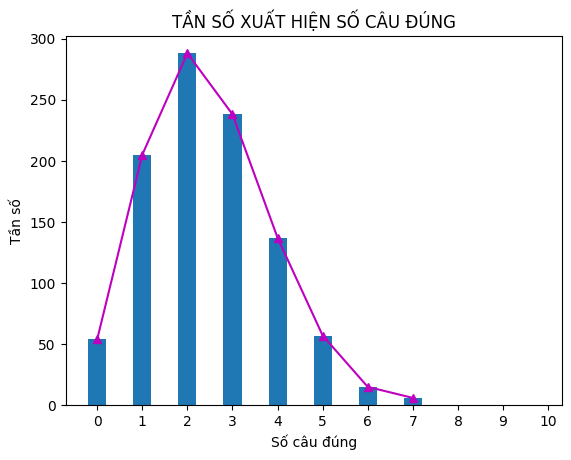

In [9]:
dorongcot = 0.4
offset = dorongcot/2

# Vẽ histogram của bi_sam_1000
plt.hist(bi_sam_1000, bins=np.arange(11)-offset, width=dorongcot)
plt.xticks(range(11))  # hiển thị danh sách các ticks trên trục hoành

# Nối đỉnh các cột lại bằng các đường nét đứt ls='--' (linestyle)
                        #, và nối các điểm đầu mỗi cột marker='o'
plt.plot(freq_table.index, freq_table, color='m', ls='-', marker='^')

plt.xlabel('Số câu đúng')
plt.ylabel('Tần số')
plt.title('TẦN SỐ XUẤT HIỆN SỐ CÂU ĐÚNG')

plt.show()

In [5]:
x = range(11)
y = binom.pmf(x, n, p)
print('x: ', x)
print('y: ', y)

x:  range(0, 11)
y:  [5.63135147e-02 1.87711716e-01 2.81567574e-01 2.50282288e-01
 1.45998001e-01 5.83992004e-02 1.62220001e-02 3.08990479e-03
 3.86238098e-04 2.86102295e-05 9.53674316e-07]


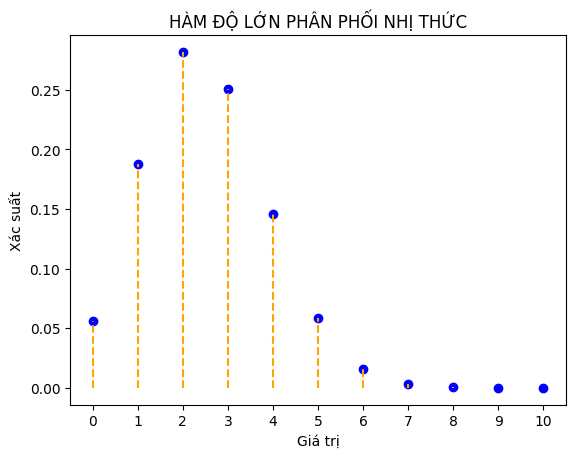

In [6]:
# Vẽ scatter
plt.scatter(x, y, color='b')

# Vẽ các đường đứt nét để dễ nhìn
for value in x:
    plt.plot([value, value], [0, y[value]], color='orange', ls='--')

plt.xticks(x)
plt.xlabel('Giá trị')
plt.ylabel('Xác suất')
plt.title('HÀM ĐỘ LỚN PHÂN PHỐI NHỊ THỨC')

plt.show()

In [7]:
xs_tich_luy = binom.cdf(x, n, p)
print(xs_tich_luy)

[0.05631351 0.24402523 0.5255928  0.77587509 0.92187309 0.98027229
 0.99649429 0.9995842  0.99997044 0.99999905 1.        ]


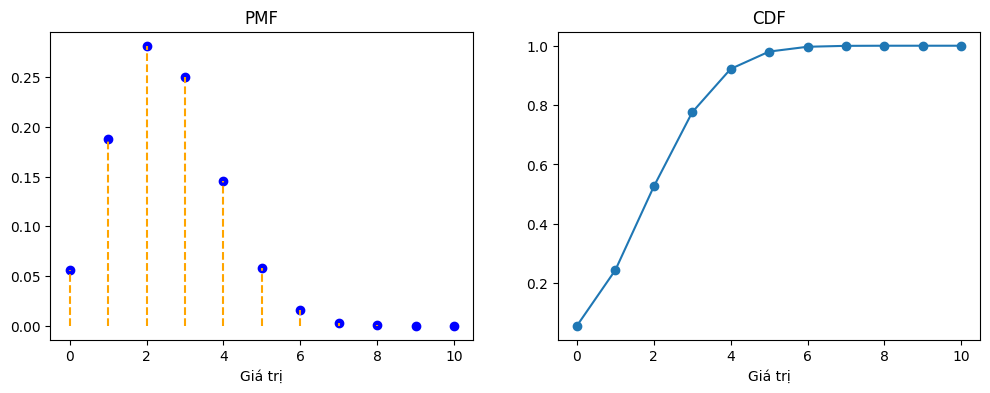

In [8]:
# Vẽ đồ thị có kích thước 12x4 (inches), gồm 2 đồ thị con (axes) nằm cùng một hàng
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Vẽ hàm độ lớn (pmf)
axes[0].scatter(x, y, color='b')

for value in x:
    axes[0].plot([value, value], [0, y[value]], color='orange', ls='--')

axes[0].set(xlabel='Giá trị', title='PMF')

# Vẽ hàm phân phối tích luỹ (cdf)
axes[1].plot(x, xs_tich_luy, marker='o') # Thêm marker cho dễ nhìn
axes[1].set(xlabel='Giá trị', title='CDF')

plt.show()

### 3.2 Phân Phối Poisson

Phân phối Poisson thường dùng để tính xác suất của một số sự kiện xảy ra trong một khoảng thời gian. Chúng ta sẽ khởi tạo ngẫu nhiên mẫu có phân phối Poisson và vẽ đồ thị hàm độ lớn của phần phối này.

#### Phát sinh mẫu

In [4]:
lamda = 1
poi_sam_10K = poisson.rvs(size=10000, mu=lamda)

In [5]:
freq_table = pd.Series(data=poi_sam_10K, name='Số câu đúng').value_counts().sort_index()
freq_table

Số câu đúng
0    3660
1    3692
2    1854
3     614
4     146
5      30
6       2
7       2
Name: count, dtype: int64

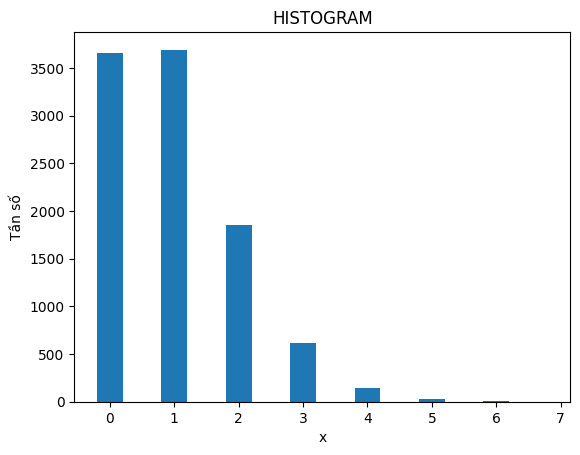

In [6]:
dorongcot=0.4
offset = dorongcot/2  # Dùng để hiển thị ngay dấu ticks

plt.hist(poi_sam_10K-offset, bins=max(freq_table.index), width=dorongcot)

plt.ylabel('Tần số')
plt.xlabel('x')
plt.title('HISTOGRAM')

plt.show()

In [8]:
lamda = 10
poi_sam_10K_another = poisson.rvs(size=10000, mu=lamda)
freq_table = pd.Series(data=poi_sam_10K_another, name='Số câu đúng').value_counts().sort_index()

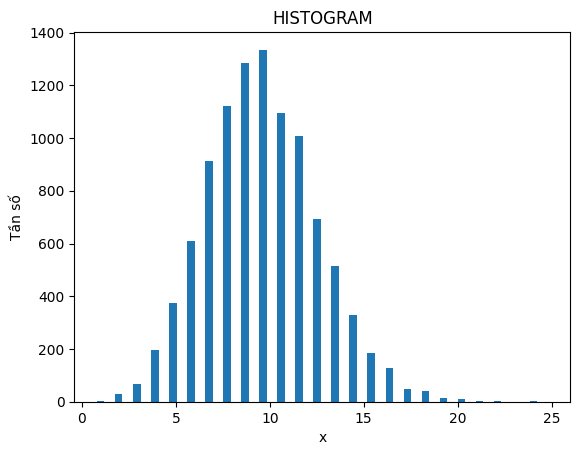

In [9]:
dorongcot=0.4
offset = dorongcot/2  # Dùng để hiển thị ngay dấu ticks

plt.hist(poi_sam_10K_another-offset, bins=max(freq_table.index), width=dorongcot)

plt.ylabel('Tần số')
plt.xlabel('x')
plt.title('HISTOGRAM')

plt.show()

#### Vẽ hàm độ lớn (pmf)

In [10]:
x = range(30)
y = poisson.pmf(x, mu=10)
print('x: ', x)
print('y: ', y)

x:  range(0, 30)
y:  [4.53999298e-05 4.53999298e-04 2.26999649e-03 7.56665496e-03
 1.89166374e-02 3.78332748e-02 6.30554580e-02 9.00792257e-02
 1.12599032e-01 1.25110036e-01 1.25110036e-01 1.13736396e-01
 9.47803301e-02 7.29079462e-02 5.20771044e-02 3.47180696e-02
 2.16987935e-02 1.27639962e-02 7.09110899e-03 3.73216263e-03
 1.86608131e-03 8.88610150e-04 4.03913704e-04 1.75614654e-04
 7.31727725e-05 2.92691090e-05 1.12573496e-05 4.16938875e-06
 1.48906741e-06 5.13471521e-07]


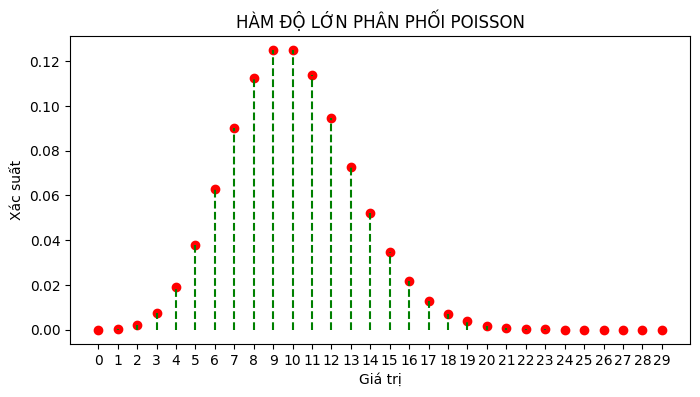

In [11]:
plt.subplots(figsize=(8, 4))

# Vẽ scatter
plt.scatter(x, y, color='red')

# Vẽ các đường đứt nét để dễ nhìn
for value in x:
    plt.plot([value, value], [0, y[value]], color='green', ls='--')

plt.xticks(x)
plt.xlabel('Giá trị')
plt.ylabel('Xác suất')
plt.title('HÀM ĐỘ LỚN PHÂN PHỐI POISSON')

plt.show()

#### Vẽ hàm phân phối tích luỹ (cdf)

Thử vẽ hàm phân phối tích luỹ của đồ thị trên (mu=10)

In [12]:
xs_tich_luy = poisson.cdf(x, mu=10)
print(xs_tich_luy)

[4.53999298e-05 4.99399227e-04 2.76939572e-03 1.03360507e-02
 2.92526881e-02 6.70859629e-02 1.30141421e-01 2.20220647e-01
 3.32819679e-01 4.57929714e-01 5.83039750e-01 6.96776146e-01
 7.91556476e-01 8.64464423e-01 9.16541527e-01 9.51259597e-01
 9.72958390e-01 9.85722386e-01 9.92813495e-01 9.96545658e-01
 9.98411739e-01 9.99300349e-01 9.99704263e-01 9.99879878e-01
 9.99953051e-01 9.99982320e-01 9.99993577e-01 9.99997746e-01
 9.99999236e-01 9.99999749e-01]


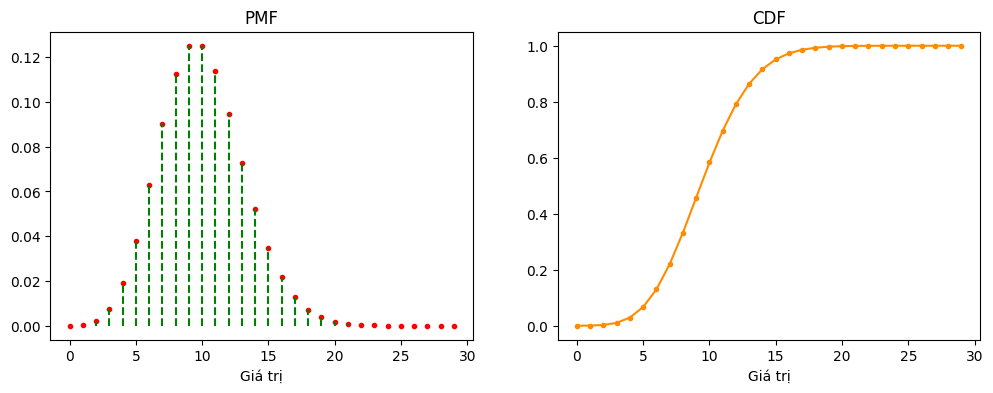

In [13]:
# Vẽ đồ thị có kích thước 12x4 (inches), gồm 2 đồ thị con (axes) nằm cùng một hàng
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Vẽ hàm độ lớn (pmf)
axes[0].scatter(x, y, color='red', marker='.')

for value in x:
    axes[0].plot([value, value], [0, y[value]], color='green', ls='--')

axes[0].set(xlabel='Giá trị', title='PMF')

# Vẽ hàm phân phối tích luỹ (cdf)
axes[1].plot(x, xs_tich_luy, marker='.',color='darkorange') # Thêm marker cho dễ nhìn
axes[1].set(xlabel='Giá trị', title='CDF')

plt.show()

### 3.3 Phân Phối Chuẩn (Normal)

#### Phát sinh mẫu

Giả sử chiều cao của nam thanh niên trưởng thành là biến ngẫu nhiên có phân phối chuẩn với kỳ vọng là 170cm, và độ lệch chuẩn là 3cm. Ta thử phát sinh ngẫu nhiên mẫu chiều cao của 10000 thanh niên.

In [14]:
mu = 170
sigma = 3
norm_sam_10K = norm.rvs(loc=mu, scale=sigma, size=10000)

#### Vẽ histogram

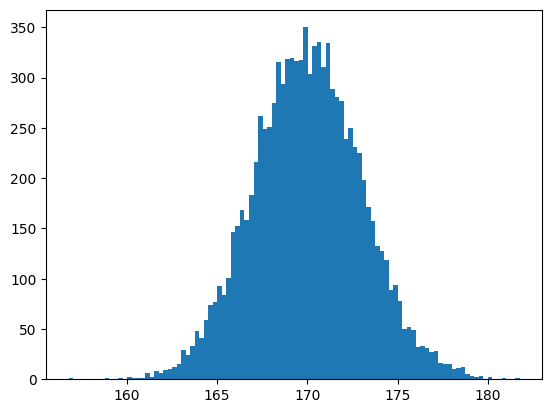

In [15]:
plt.hist(norm_sam_10K, bins=100)

plt.show()

#### Vẽ hàm mật độ (pdf)

Thử vẽ đồ thị hàm mật độ của phân phối chuẩn với các tham số $\mu$ và $\sigma$ khác nhau

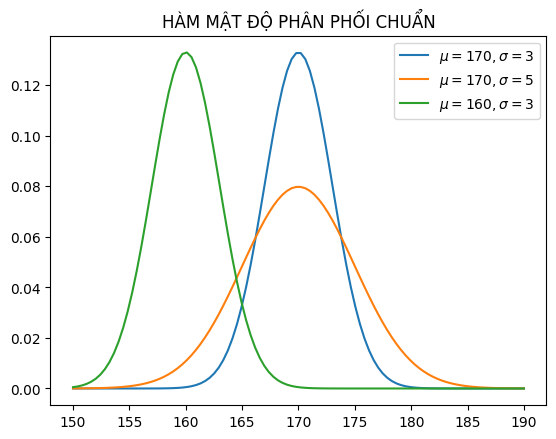

In [16]:
x = np.linspace(150, 190, 100)
y1 = norm.pdf(x, loc=170, scale=3)
y2 = norm.pdf(x, loc=170, scale=5)
y3 = norm.pdf(x, loc=160, scale=3)

plt.plot(x, y1, label='$\mu=170, \sigma=3$')
plt.plot(x, y2, label='$\mu=170, \sigma=5$')
plt.plot(x, y3, label='$\mu=160, \sigma=3$')

plt.title('HÀM MẬT ĐỘ PHÂN PHỐI CHUẨN')
plt.legend()
plt.show()

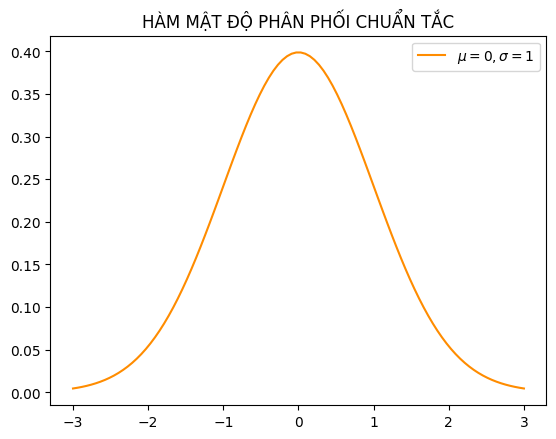

In [17]:
xx = np.linspace(-3, 3, 100)
yy = norm.pdf(xx) # mặc định loc=0, scale=1

plt.plot(xx, yy, color='darkorange', label='$\mu=0, \sigma=1$')
# plt.plot(xx, yy)
plt.title('HÀM MẬT ĐỘ PHÂN PHỐI CHUẨN TẮC')
plt.legend()

plt.show()

In [18]:
norm.pdf(-1)

0.24197072451914337

#### Tính toán trên phân phối chuẩn

Một số hàm thường dùng trên phân phối chuẩn

In [19]:
xs_be_hon_1 = norm.cdf(x= -1, loc = 0, scale= 1)     

xs_lon_hon_1 = 1 - norm.cdf(x= 1, loc = 0, scale= 1) 

xs_giua = 1 - (xs_be_hon_1 + xs_lon_hon_1)

print(xs_be_hon_1, xs_lon_hon_1, xs_giua)

0.15865525393145707 0.15865525393145707 0.6826894921370859


Text(1.3, 0.03, '0.159')

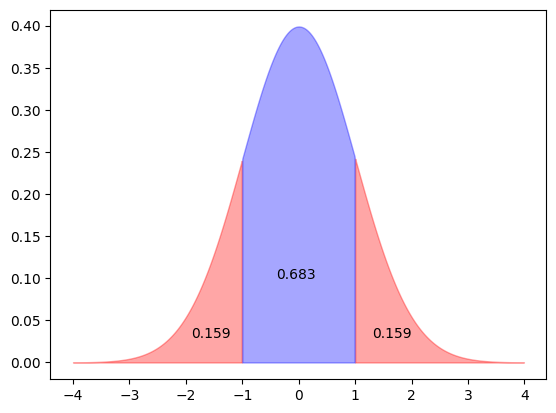

In [20]:
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= norm.pdf(np.arange(-4,-1,0.01)) ,
                 color='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= norm.pdf(np.arange(1,4,0.01)) ,
                 color='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= norm.pdf(np.arange(-1,1,0.01)) ,
                 color='blue',
                 alpha=0.35)

plt.text(x=-1.9, y=0.03, s= round(xs_be_hon_1, 3))
plt.text(x=-0.4, y=0.1, s= round(xs_giua,3))
plt.text(x=1.3, y=0.03, s= round(xs_lon_hon_1, 3))

Hàm **cdf()**

In [21]:
norm.cdf(-2).round(5)

0.02275

In [22]:
norm.ppf(0.02275, loc=16, scale=4).round(2)

8.0

Hàm **ppf()**

In [23]:
norm.ppf(0.02275).round(2)

-2.0

Hàm **sf()**

In [24]:
norm.sf(2).round(5)

0.02275

Hàm **isf()**

In [25]:
norm.isf(0.02275).round(2)

2.0

In [26]:
binom.pmf(1, 3, 0.9545)

0.005928160874999993

In [27]:
x_177 = norm.cdf(177, loc=175, scale=4)
x_166 = norm.cdf(166, loc=175, scale=4)

x_177 - x_166

0.6792379886189684

In [28]:
norm.ppf(0.33, loc=175, scale=4)

173.24034733730707

In [29]:
norm.ppf(0.45)

-0.12566134685507402